
Exploring dataset: hourly_data.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64729 entries, 0 to 64728
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    64729 non-null  int64  
 1   DATE                       64729 non-null  object 
 2   REPORT_TYPE                64729 non-null  object 
 3   SOURCE                     64729 non-null  int64  
 4   BackupElements             64729 non-null  object 
 5   BackupElevation            64729 non-null  int64  
 6   BackupEquipment            64729 non-null  object 
 7   BackupLatitude             64729 non-null  float64
 8   BackupLongitude            64729 non-null  float64
 9   BackupName                 64729 non-null  object 
 10  HourlyAltimeterSetting     64729 non-null  object 
 11  HourlyDewPointTemperature  64729 non-null  object 
 12  HourlyDryBulbTemperature   64729 non-null  object 
 

/tmp/ipykernel_33/1366398204.py:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T00:51:00       FM-15       7         PRECIP   
1  72518014735  2015-01-01T01:51:00       FM-15       7         PRECIP   
2  72518014735  2015-01-01T02:51:00       FM-15       7         PRECIP   
3  72518014735  2015-01-01T03:51:00       FM-15       7         PRECIP   
4  72518014735  2015-01-01T04:51:00       FM-15       7         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ... HourlyDryBulbTemperature HourlyPrecipitation  \
0  NWS ALBANY, NY  ...                       22          

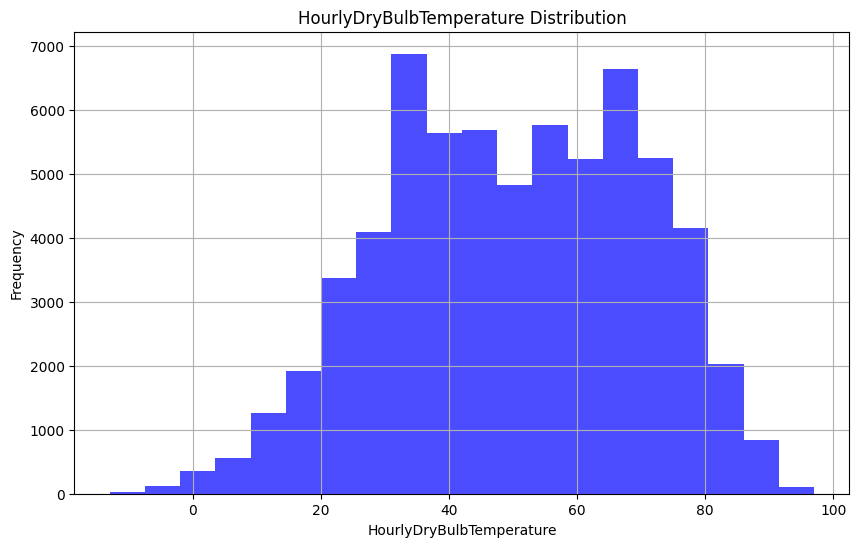


Exploring dataset: daily_data.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                          

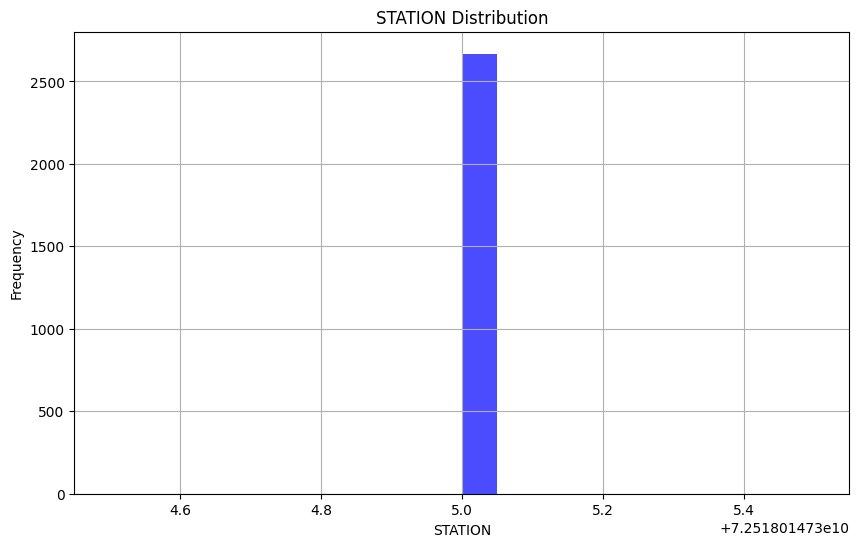


Exploring dataset: monthly_data.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   STATION                                       87 non-null     int64  
 1   DATE                                          87 non-null     object 
 2   REPORT_TYPE                                   87 non-null     object 
 3   SOURCE                                        87 non-null     int64  
 4   AWND                                          87 non-null     float64
 5   BackupElements                                87 non-null     object 
 6   BackupElevation                               87 non-null     int64  
 7   BackupEquipment                               87 non-null     object 
 8   BackupLatitude                                87 non-null     float64
 9   BackupLongitude 

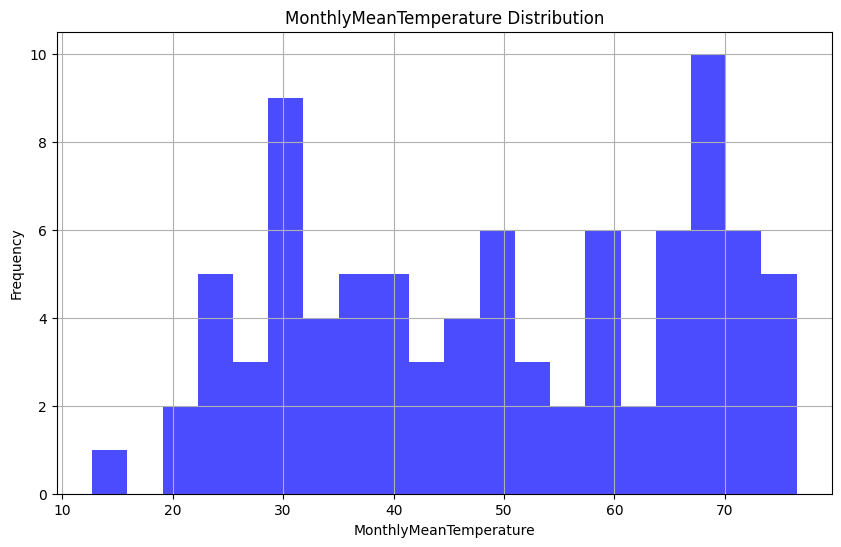


Exploring dataset: three_hour_data.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20843 entries, 0 to 20842
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    20843 non-null  int64  
 1   DATE                       20843 non-null  object 
 2   REPORT_TYPE                20843 non-null  object 
 3   SOURCE                     20843 non-null  int64  
 4   BackupElements             20843 non-null  object 
 5   BackupElevation            20843 non-null  int64  
 6   BackupEquipment            20843 non-null  object 
 7   BackupLatitude             20843 non-null  float64
 8   BackupLongitude            20843 non-null  float64
 9   BackupName                 20843 non-null  object 
 10  HourlyDewPointTemperature  20843 non-null  object 
 11  HourlyDryBulbTemperature   20843 non-null  object 
 12  HourlyPressureChange       20843 non-null  float

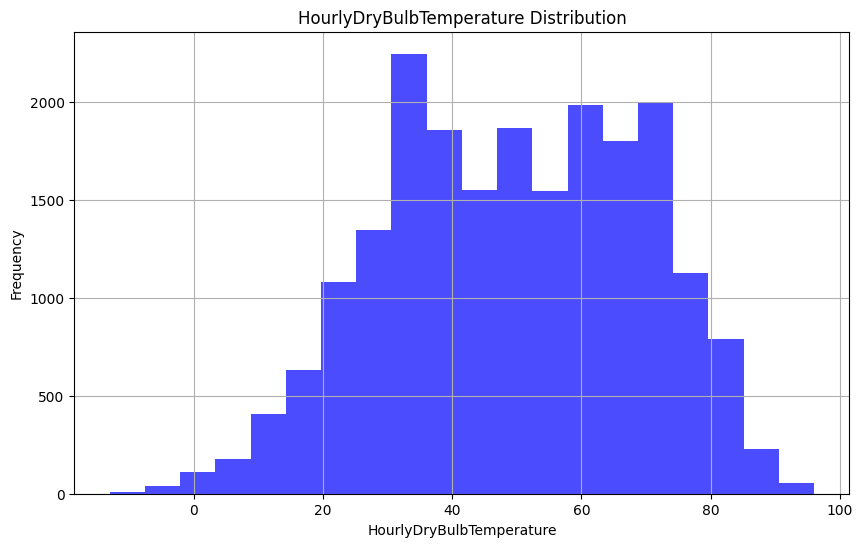

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load a dataset and perform basic exploratory data analysis
def explore_dataset(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Display basic information about the dataset
    print("Dataset Info:")
    print(df.info())
    
    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe())
    
    # Display the first few rows of the dataset
    print("\nFirst few rows:")
    print(df.head())
    
    # Visualize key variables
    # Example: Plot histograms for appropriate columns
    plt.figure(figsize=(10, 6))
    
    # Choose an appropriate column for histogram based on dataset
    if 'HourlyDryBulbTemperature' in df.columns:
        column_for_histogram = 'HourlyDryBulbTemperature'
    elif 'DailyAverageTemperature' in df.columns:
        column_for_histogram = 'DailyAverageTemperature'
    elif 'MonthlyMeanTemperature' in df.columns:
        column_for_histogram = 'MonthlyMeanTemperature'
    else:
        column_for_histogram = df.columns[0]  # Use the first column as default
    
    # Convert the column to numeric if it's not already
    df[column_for_histogram] = pd.to_numeric(df[column_for_histogram], errors='coerce')
    
    # Plot histogram if the chosen column exists
    if column_for_histogram in df.columns:
        plt.hist(df[column_for_histogram].dropna(), bins=20, color='blue', alpha=0.7)
        plt.title(f'{column_for_histogram} Distribution')
        plt.xlabel(column_for_histogram)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, "No appropriate column found for histogram", horizontalalignment='center', verticalalignment='center', fontsize=12, transform=plt.gca().transAxes)
    
    plt.grid(True)
    plt.show()

# Specify the folder path containing the datasets
folder_path = "/kaggle/input/temperature-data-albany-new-york"

# List of dataset filenames
file_names = ['hourly_data.csv', 'daily_data.csv', 'monthly_data.csv', 'three_hour_data.csv']

# Perform exploratory data analysis for each dataset
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    print(f"\nExploring dataset: {file_name}")
    explore_dataset(file_path)
